# Assignment 1 - Adrien Guezennec

## Introduction
The goal for this assignment was to implement from scratch a Naive Bayes, a cross validator and a ROC.
I personnaly use Python as language.

You can see my [repository](https://github.com/adrienGzc/machine-learning-lab) on Github you want.
I added a Dockerfile if you don't want to run it in your environment.


I structured my report the same order as I coded the assignment. So, Naive Bayes first after the Cross validator and to end the ROC.
</br>

## Naive Bayes
To start my work I first take a look at [wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes) to check the implementation.
Once I read it, I start design my class with the method public and private needed.
I make it simpler so you just have the initialization of the Class and you can fit(), which mean train with the training data, and predict(), which mean predict the output class with the test data given in input.

I'm gonna start to explain the fit() method and what she is doing inside, here is the code:

In [1]:
  # Training method. Take the training data and the target of the training data.
  def fit(self, trainData=None, trainTarget=None):

    # Store the data + label in the Naive Bayes class.
    self.__setTrainData(trainData, trainTarget)

    # Clean variables before to use it if algo used in cross validation or in a loop.
    self.trainedFeature.clear()
    self.splitedClasses.clear()

    # Return a dictionnary with all the different label as a key with the instances related in it.
    splitedCLasses = self.__classSpliter()

    # For every class, we reduce all the instance into the number of instances, the mean and the standard deviation.
    for key, value in splitedCLasses.items():
      self.trainedFeature[key] = self.__squashFeature(value)
    
    return self

I tried to add comment to make it easier to read and to understand.
Basically, this method take a training data with the label expected and store them in the class so I can have access eveywhere in my class.

In [2]:
  # Store training data in the Naive Bayes class
  def __setTrainData(self, trainData, targetData):
    self.trainData = trainData
    self.trainTarget = targetData

After that, I cluster all the instances into their own class label. This is going to help me after for the prediction class.
Here is the code for the splitter:

In [3]:
  # Divide data by class.
  def __classSpliter(self):
    for index, target in enumerate(self.trainData):
      # Create new key in dict if class not already created.
      if (self.trainTarget[index] not in self.splitedClasses):
        self.splitedClasses[self.trainTarget[index]] = list()
      # Add the instance to the corresponding class.
      self.splitedClasses[self.trainTarget[index]].append(target)
    return self.splitedClasses

At the end it give me a dict() in python with the class label as a key and a list of all the instances attached.
```javascript
{1: [[6.3, 2.3, 4.4, 1.3],
     [5.1, 2.5, 3.0, 1.1],
     ...],
 2: [[6.3, 2.9, 5.6, 1.8],
     [6.8, 3.0, 5.5, 2.1],
     ...]}
```

The next step is summarize the features of the instances. So, for each class I summarize the instances features to get the mean and the standard deviation for all features. Let me show you the code and explain you what I did in the squashFeature method.

In [4]:
  # Calcule mean and standard deviation for each column (feature) in the training data.
  def __squashFeature(self, classData):
    tmp = list()

    # The built-in zip give me all data from 1 column (feature), at once, on the classData list.
    for feature in zip(*classData):
      tmp.append((len(feature), self.__mean(feature), self.__standardDeviation(feature)))
    return tmp

I take profit of the zip built-in to get each feature of all instances at the same time and make my operation on it. So, I can easily get the mean of all input from feature 1 and the standard deviation at the same time. And this for all features.
For the mean and the standard deviation I thought using the numpy library but I didn't know if we could use external library for those kind of calculus. So, I implemented the function myself using this [website](https://www.w3schools.com/python/python_ml_standard_deviation.asp) (for the standard deviation.

In [5]:
  # Return the mean of a list.
  def __mean(self, feature):
    return sum(feature) / len(feature)


  # Return the variance of a list.
  def __variance(self, feature):
    meanDifference = list()
    mean = self.__mean(feature)

    for instance in feature:
      meanDifference.append(pow((instance - mean), 2))
    return self.__mean(meanDifference)


  # Return the standard deviation from a list.
  def __standardDeviation(self, feature):
    return round(math.sqrt(self.__variance(feature)), 2)

Nothing crazy here, the w3school website explain it very well to reproduce it.
</br>

After training, place to prediction:

In [6]:
  # Method to predict, should be used after the fit method.
  def predict(self, testData):
 
    # If there is no training done before then return false with error message.
    if len(self.trainedFeature) is 0:
      print('Error: no training data recorded. Please fit (train) before to predict.')
      return False

    self.__setTestData(testData)

    # For every test instance we predict the class which she is the closer.
    predictions = list()
    for testInstance in self.testData:
      predictions.append(self.__getPredictionForInstance(testInstance))
    return predictions

The main part of the prediction is the for loop at the end. For each instance test I make a prediction to get the class predicted and the class probabilities output.

In [7]:
  # Return, for the instances, the predicted class + the probabilities in a tuple.
  def __getPredictionForInstance(self, testInstance):
    classValue = None
    predictedClass = None
    # Get the class probability for the test instance.
    probaResults = self.__getPropabilities(testInstance)

    # Check which class as the most probability, this is gonna be out prediction.
    for key, value in probaResults.items():
      # If first loop lap OR the probability is higher than the actual then set the new class as the highest proba.
      if (classValue is None or classValue < value):
        classValue = value
        predictedClass = key
    return ((predictedClass, probaResults))

In [8]:
  # Return the classes probability based on the instance given.
  def __getPropabilities(self, testInstance):
    probabilities = dict()

    for key, value in self.trainedFeature.items():
      probabilities[key] = value[0][0] / len(self.trainData)

      for index in range(len(value)):
        # Get the mean and standard deviation from each feature
        _nbInstance, mean, standardDeviation = value[index]
        # Multiply the gaussian for each feature 
        probabilities[key] *= self.__gaussian(testInstance[index], mean, standardDeviation)
    return probabilities

In [9]:
  # Awful to read, I apologize for that, but correspond to the gaussian normal distribution.
  def __gaussian(self, feature, mean, standardDeviation):
    return (1 / (math.sqrt(2 * math.pi) * standardDeviation)) * math.exp(-((feature - mean) ** 2 / (2 * standardDeviation ** 2 )))

As you can see I put the 3 functions I used for the prediction. They are all related so it's gonna be easier to explain if you have a good picture of what happen.
So here, even if you can understand with the comment, I summarize the features of the test instance with each feature of each class trained. For that, I used the gaussian normal distribution from the Naive Bayes wiki page. At the end I got a probability for each class that I can compare and choose the highest one. An evolution here would be to adapt the choosing process of when a probability is negatif or positif.


## Cross validator
For the cross validator I only make one public method which is score(). At the initialization you indicate the algorithm, a dataset and the number of fold that you want. The subject asked for 10 fold so every test was made on a base off 10 folds but I tried other number and work as well.

In [10]:
  # Calculate the score of the accuracy:
  #   - all the accuracy as a list, len(list accuracy) = nbFolds.
  #   - the mean accuracy based on all the accuracy.
  #   - a list with -> Prediction, Classes probabilities, Real target expected.
  def score(self):
    if (self.__checkNotEmptyAttributes() is False):
      return False

    # Split the data into K folds.
    self.__splitDatasetIntoKFolds()
    accuracyScores = list()
    for index, fold in enumerate(self.folds):
      trainData = self.__getTrainData(self.folds, index)
      # Extract the label from the dataset.
      targetTrain = self.__getTargetFromData(trainData)
      testData = copy.deepcopy(fold)
      targetTest = self.__getTargetFromData(testData)

      # Train the Naive Bayes algorithm.
      self.algorithm.fit(trainData, targetTrain, False)
      # Predict with the fold.
      predictionFold = self.algorithm.predict(testData)
      # Add to the data for the ROC the prediction information with the target label.
      self.rocData.extend(self.__appendTargetToPrediction(targetTest, predictionFold))
      # Add the accuracy calculate.
      accuracyScores.append(self.__getAccuracy(targetTest, predictionFold))
    return accuracyScores, sum(accuracyScores) / len(accuracyScores), self.rocData

I hope the variable name and the comment help you to understand what the function are and used for.

In [11]:
  # nbInstances as to be lower than nbFolds, I round the return to get a integer and not a float.
  def __getFoldSize(self, nbInstances, nbFolds):
    return round(nbInstances / nbFolds)

  # Fill the folds Class variable with all folds of instances shuffled.
  def __splitDatasetIntoKFolds(self):
    copyDataset = self.dataset.copy()
    # Desorganize the dataset
    random.shuffle(copyDataset)
    # Get the number of instances in each fold.
    foldSize = self.__getFoldSize(len(self.dataset), self.nbFolds)

    # I move the pointer start and end to cur the dataset into the number of instances calculated.
    for nb in range(self.nbFolds):
      start = foldSize * nb
      end = foldSize + start
      self.folds.append(copyDataset[start:end])

  # Extract the label (target) from a dataset, it must be the last column.
  def __getTargetFromData(self, dataset):
    return [instance.pop(-1) for instance in dataset]

  # Count the correct answer and return the accuracy of them, scaled on 0 to 100%.
  def __getAccuracy(self, original, predictions):
    nbCorrectPredictions = 0

    # Loop through all the predictions.
    for index in range(len(predictions)):
      # Get the class predicted.
      predictClass = predictions[index][0]

      # If she correspond to the target label then add a correct answer.
      if (original[index] == predictClass):
        nbCorrectPredictions += 1

    return nbCorrectPredictions / len(original) * 100

  # Return a simple list of instances as a deep copy and delete the testing fold.
  def __getTrainData(self, dataToSquash, indexToRemove):
    data = copy.deepcopy(self.folds)
    data.pop(indexToRemove)
    return sum(data, [])

  # Some magic here. Add the target label to the prediction information for the ROC.
  def __appendTargetToPrediction(self, targets, predictions):
    for index in range(len(predictions)):
      tmp = list(predictions[index])
      tmp.append(targets[index])
      predictions[index] = tmp
    return predictions

For the split I round the result to get a integer and not a float. I used it to get the number of instance in each fold and so I can start the spliting on the list of instances.
The problem I got here was the copy of the folds. Basically, I had to make a deep copy and not a shallow copy because a shallow copy doesn't change the address too deep so I had side effect from the copy to the original.

In [12]:
class CrossValidator:
  def __init__(self, algo=None, dataset=None, nbFolds=10):
    random.seed(1)
    self.folds = list()
    self.algorithm = algo
    self.dataset = list(dataset)
    self.nbFolds = nbFolds
    self.rocData = list()

  # Method to check if the CrossValidator class as everything needed to start.
  def __checkNotEmptyAttributes(self):
    if (self.algorithm is None or self.dataset is None or self.nbFolds <= 1):
      print("Error: Algorithm and dataset shouldn't be empty and nbFolds neither less nor equal to 0")
      return False
    return True

This is just a verificationnn function to see if I can start the cross validation or not.

## ROC
For the plot I used the matplot lib to display the ROC Curve.
I based my ROC on the [wikipedia page](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and this [blog](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) I found on internet which explain it very well.
Even though, I struggle to get a real result on the curve...

In [13]:
import matplotlib.pyplot as plt

class ROC:
  def __init__(self):
    self.tpr = list()
    self.fpr = list()

  # Calculate the ROC with the information from the prediction given by the cross validator.
  def rocCurve(self, rocData):
    tp, tn, fp, fn = 0, 0, 0, 0

    for index in range(len(rocData)):
      # Get the negative class.
      class0 = min(rocData[index][1])
      # Get the positive class.
      class1 = max(rocData[index][1])
      # Get the predicted class by the Naive Bayes.
      predictClass = rocData[index][0]
      # Get the target label expected.
      target = rocData[index][2]

      # Main if forest to fill the appropriate variable for the TPR and the FPR.
      if (predictClass == class1 and target == predictClass):
        tp += 1
      elif (predictClass == class1 and target is not predictClass):
        fp += 1
      elif (predictClass == class0 and target == predictClass):
        tn += 1
      elif (predictClass == class0 and target is not predictClass):
        fn += 1
      # Based on wiki, calculate the TRP with the previous variable.
      self.tpr.append(tp / (tp + fn))
      # Same as TPR but for FPR.
      self.fpr.append(fp / (fn + tp))

  # Display the ROC Curve with matplot.    
  def showROC(self):
    lw = 1.5
    plt.plot(self.fpr, self.tpr, color='darkorange', lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.02])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

The problem I got here was maybe the calculation of the TPR and the FPR. But based on the wikipedia page and the lecture there is nothing fancy with the calculation so sorry but I don't know yet. You can see the result at the end of this report.


## Main

Accuracy: 100.00%


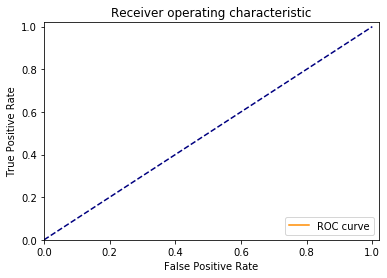

Accuracy: 100.00%


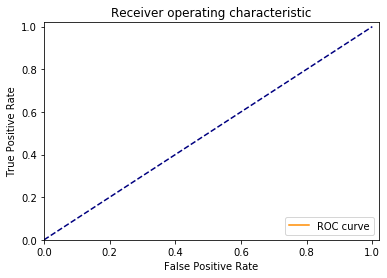

Accuracy: 93.00%


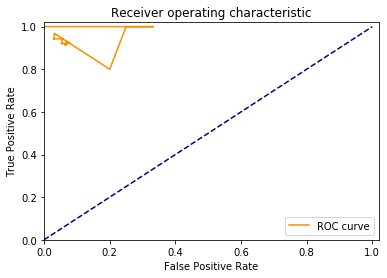

Accuracy: 94.67%


In [15]:
import random
import pprint
from sklearn import datasets

import ROC
import NaiveBayes
import CrossValidator

# Add the target label at the end of the dataset. Needed to shuffle the data easily.
def concateTargetWithDataset(dataset, targetDataset):
  data = list()
  for index, instance in enumerate(dataset):
    tmp = list(instance)
    tmp.append(targetDataset[index])
    data.append(tmp)
  return data

# Just the same but whitout a different flower (3) to stay on a binary classification.
def mainWhitoutFirstFlower():
  irisData = datasets.load_iris()
  irisData.data = irisData.data[:-50]
  irisData.target = irisData.target[:-50]
  newDataset = concateTargetWithDataset(irisData.data, irisData.target)

  naiveBayes = NaiveBayes.NaiveBayes()
  crossValidator = CrossValidator.CrossValidator(algo=naiveBayes, dataset=newDataset, nbFolds=10)
  _scoresByFold, meanAccuracy, rocData = crossValidator.score()
  print('Accuracy: %.2f%%' % meanAccuracy)

  roc = ROC.ROC()
  roc.rocCurve(rocData)
  roc.showROC()

# Just the same but whitout a different flower (2) to stay on a binary classification.
def mainWhitoutMiddleFlower():
  irisData = datasets.load_iris()
  irisData.data = [instance for index, instance in enumerate(irisData.data) if index < 51 or index > 100]
  irisData.target = list(filter(lambda label: label != 1, irisData.target))
  newDataset = concateTargetWithDataset(irisData.data, irisData.target)

  naiveBayes = NaiveBayes.NaiveBayes()
  crossValidator = CrossValidator.CrossValidator(algo=naiveBayes, dataset=newDataset, nbFolds=10)
  _scoresByFold, meanAccuracy, rocData = crossValidator.score()
  print('Accuracy: %.2f%%' % meanAccuracy)

  roc = ROC.ROC()
  roc.rocCurve(rocData)
  roc.showROC()

# Whitout the last flower (1) to stay on a binary classification.
def mainWhitoutLastFlower():
  irisData = datasets.load_iris()
  irisData.data = irisData.data[50:]
  irisData.target = irisData.target[50:]
  newDataset = concateTargetWithDataset(irisData.data, irisData.target)

  naiveBayes = NaiveBayes.NaiveBayes()
  crossValidator = CrossValidator.CrossValidator(algo=naiveBayes, dataset=newDataset, nbFolds=10)
  _scoresByFold, meanAccuracy, rocData = crossValidator.score()
  print('Accuracy: %.2f%%' % meanAccuracy)

  roc = ROC.ROC()
  roc.rocCurve(rocData)
  roc.showROC()

# Try with all flower, expect with the ROC as the ROC is for binary classification
def mainWIthAllFlower():
  irisData = datasets.load_iris()
  newDataset = concateTargetWithDataset(irisData.data, irisData.target)

  naiveBayes = NaiveBayes.NaiveBayes()
  crossValidator = CrossValidator.CrossValidator(algo=naiveBayes, dataset=newDataset, nbFolds=10)
  _scoresByFold, meanAccuracy, _rocData = crossValidator.score()
  print('Accuracy: %.2f%%' % meanAccuracy)

if __name__ == "__main__":
    mainWhitoutFirstFlower()
    mainWhitoutMiddleFlower()
    mainWhitoutLastFlower()
    mainWIthAllFlower()